In [13]:
#导入skleran 机器学习工具包的k-means
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt  #Python导入Matplotlib包，专门用于绘图
from mpl_toolkits.mplot3d import Axes3D
import time

# 数据导入

In [14]:
Training_Data=np.loadtxt('D:\杭电与人工智能研究院\光伏教仪\人工智能课程案例\课程实验课件\机器学习课程实验四___聚类分析\Training_data.txt')


# 调用kmeans类

#n_clusters=4生成聚类数，即产生的质心数
#max_iter 执行一次k-means算法所进行的最大迭代数
#n_init 用不同的质心初始化值运行算法的次数，最终解是在inertia意义下选出的最优结果。

In [18]:
n_clusters=4
clf = KMeans(n_clusters=4, max_iter=300, n_init=10)
begin_time = time.time()  # 记录训练开始时间
s = clf.fit(Training_Data)
Training_time = time.time() - begin_time  # 记录训练用时
#对数据进行预测
y_pred = clf.fit_predict(Training_Data) 
print(s) 
#4个质心
print(clf.cluster_centers_) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 14.20316514   0.14243119]
 [ 14.94741445   0.1706654 ]
 [ 13.23711864   0.10579096]
 [ 15.68478873   0.18697183]]


In [16]:
# 获取第一列和第二列数据 使用for循环获取 n[0]表示数据第一列
x1 = [n[0] for n in Training_Data]
x2 = [n[1] for n in Training_Data]
#x3 = [n[2] for n in Training_Data]
c1 = [m[0] for m in clf.cluster_centers_]
c2 = [m[1] for m in clf.cluster_centers_]
#c3 = [m[2] for m in clf.cluster_centers_]

In [33]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
# 结果可视化
plt.figure(figsize=(16, 6))  # 窗口大小
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)  # # 窗口四周留白
colors = ['#4EACC5', '#FF9C34', '#4E9A06','#EE82EE']  # 三种聚类的颜色

# 两个个聚类点排序
k_means_cluster_centers = np.sort(clf.cluster_centers_, axis=0) 
# 计算X中每个样本与k_means_cluster_centers中的哪个样本最近。也就是获取所有对象的所属的类标签
k_means_labels = pairwise_distances_argmin(Training_Data, k_means_cluster_centers) 



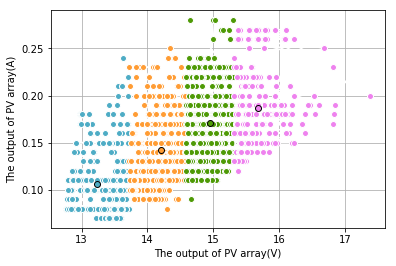

In [50]:


for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k  # 获取属于当前类别的样本
    cluster_center = k_means_cluster_centers[k]  # 获取当前聚类中心
     #绘制当前聚类的样本点
    plt.plot(Training_Data[my_members, 0], Training_Data[my_members, 1], 'w',markerfacecolor=col, marker='o') 
    # 绘制聚类中心点
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,markeredgecolor='k', markersize=6) 

plt.grid(True)
plt.xlabel('The output of PV array(V)')
plt.xlabel('The output of PV array(V)')

plt.title('k-means cluster')
# 显示图形
plt.show()